# Customer segmentation

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membership card they provide following information : gender, age and annual income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the Spending score of all customers. We have to segment these customers based on the details given. 

We have some basic data about customers like Customer ID, age, gender, annual income and spending score. Spending Score is assigned to the customer based on some parameters like customer behavior and purchasing data. We will try to cluster this data according to these features.

Here, we will-

Read and Explore Data, and

Implement K-Means

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Getting dataset
df=pd.read_csv("Mall_Customers_data.csv")

# EDA (Exploratory Data Analysis)

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape
#The dataset has 200 rows and 5 columns

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The columns are-

CustomerID,

Gender,

Age,

Annual Income (k$),

Spending Score (1-100)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Checking null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values

In [8]:
# Dropping unwanted column
df.drop(['CustomerID'], axis=1, inplace=True)

In [9]:
# Rename columns for ease
# Annual Income (k$) as AnnualIncome,Spending Score (1-100) as SpendingScore
df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'}, inplace= True)

In [10]:
df.head()

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Data visualization

<Figure size 720x432 with 0 Axes>

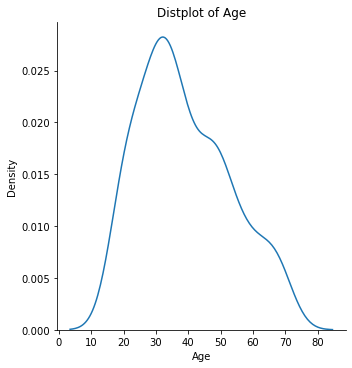

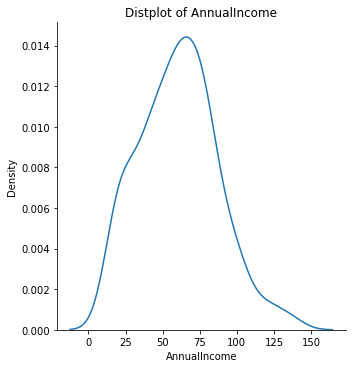

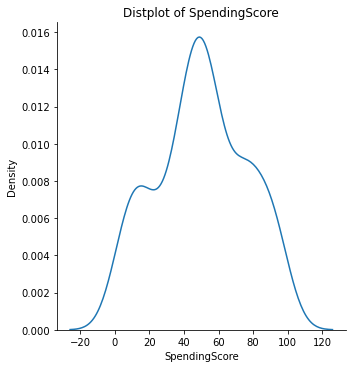

In [11]:
plt.figure(figsize=(10,6))
for x in ['Age', 'AnnualIncome', 'SpendingScore']:
    sns.displot(df[x], kind='kde')
    plt.title("Distplot of {}".format(x))
plt.show()

Most of the customers are in the age group of 20 to 40.
More customers have income is in the range of 50k to 70k and spending score of 50.

<AxesSubplot:>

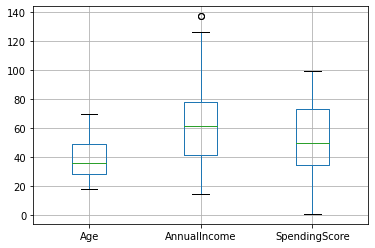

In [12]:
#Using boxplot for numeric variables to check for outliers                               
df.boxplot(column=['Age', 'AnnualIncome', 'SpendingScore'])

Only Annual Income has an outlier which can be due to high income of some customers, so no need to treat it.

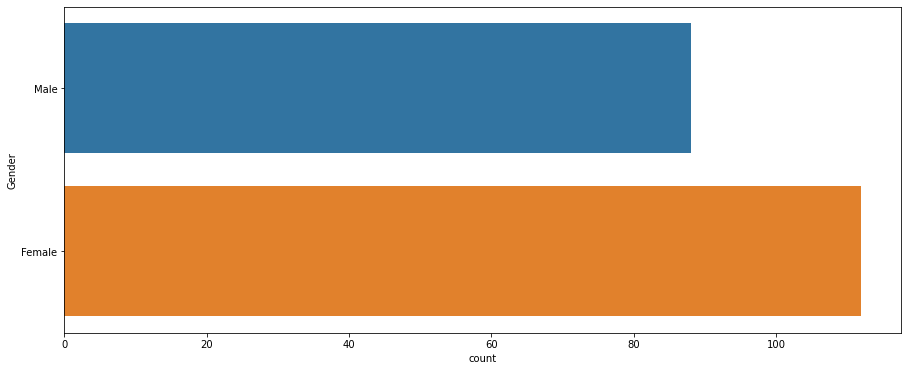

In [13]:
# Visualizing Gender Distribution using Countplot
plt.figure(figsize=(15,6))
sns.countplot(y='Gender', data=df)
# Displaying the plot
plt.show()

There are more females than males in the dataset.

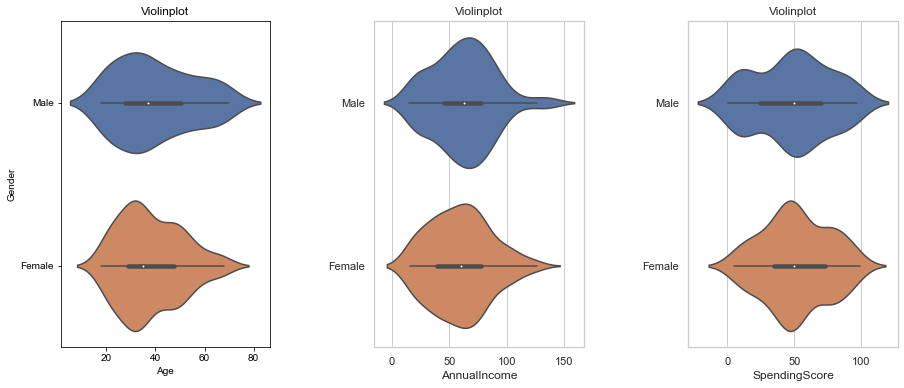

In [14]:
# Violin distribution of numeric columns versus gender
plt.figure(figsize=(15,6))
n=0
for col in ['Age', 'AnnualIncome', 'SpendingScore']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.violinplot(x=col, y='Gender', data=df)
    plt.ylabel("Gender" if n==1 else '')
    plt.title('Violinplot')
plt.show()

High number of females are in the age group of 30-35 as compared to males.
Annual income distribution is almost similar for males and females but there are some males with income higher than females.
Female have higher spending score between 45-50 as compared to males.

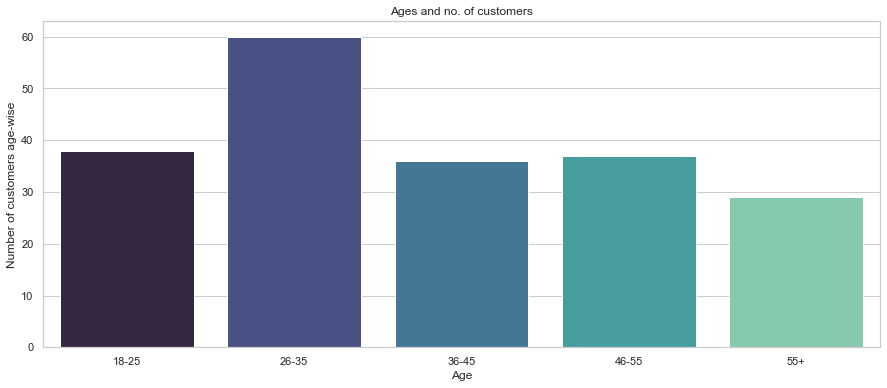

In [15]:
# Dividing "Age" into different ranges to check which range has the highest number of customers
age_18to25=df.Age[(df.Age>=18) & (df.Age<=25)]
age_26to35=df.Age[(df.Age>=26) & (df.Age<=35)]
age_36to45=df.Age[(df.Age>=36) & (df.Age<=45)]
age_46to55=df.Age[(df.Age>=46) & (df.Age<=55)]
age_55above=df.Age[df.Age>=56]

# Visualizing for the above created ranges of Age
agex=["18-25","26-35","36-45","46-55","55+"]
agey=[len(age_18to25.values), len(age_26to35.values), len(age_36to45.values), len(age_46to55.values), len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Ages and no. of customers")
plt.xlabel("Age")
plt.ylabel("Number of customers age-wise")
plt.show()

Most of the customers are in the age group of 26-35 years. It may be due to their income that they buy more than others.

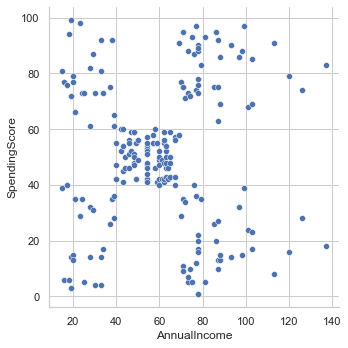

In [16]:
# Visualizing relationship between Annual income and Spending score
sns.relplot(x="AnnualIncome", y="SpendingScore", data=df)

There is not much relationship between spending score and annual income between 20-40k and 80-140k. 
But there is some relationship between spending score of 40-60 and annual income between 40-60k.

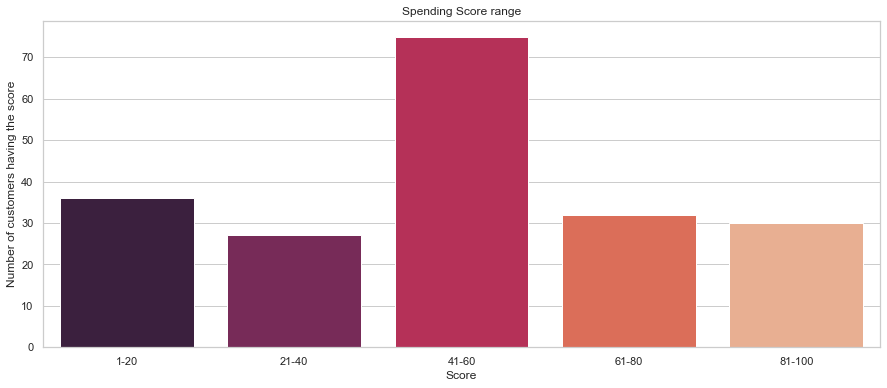

In [17]:
# Now dividing spending score in different ranges
ss_1to20=df.SpendingScore[(df.SpendingScore>=1) & (df.SpendingScore<=20)]
ss_21to40=df.SpendingScore[(df.SpendingScore>=21) & (df.SpendingScore<=40)]
ss_41to60=df.SpendingScore[(df.SpendingScore>=41) & (df.SpendingScore<=60)]
ss_61to80=df.SpendingScore[(df.SpendingScore>=61) & (df.SpendingScore<=80)]
ss_81to100=df.SpendingScore[(df.SpendingScore>=81) & (df.SpendingScore<=100)]

# Visualizing for the above created ranges of Spending score
ssx=["1-20", "21-40","41-60","61-80","81-100"]
ssy=[len(ss_1to20.values), len(ss_21to40.values), len(ss_41to60.values), len(ss_61to80.values), len(ss_81to100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Score range")
plt.xlabel("Score")
plt.ylabel("Number of customers having the score")
plt.show()

Maximum number of customers have spending score between 41-60.

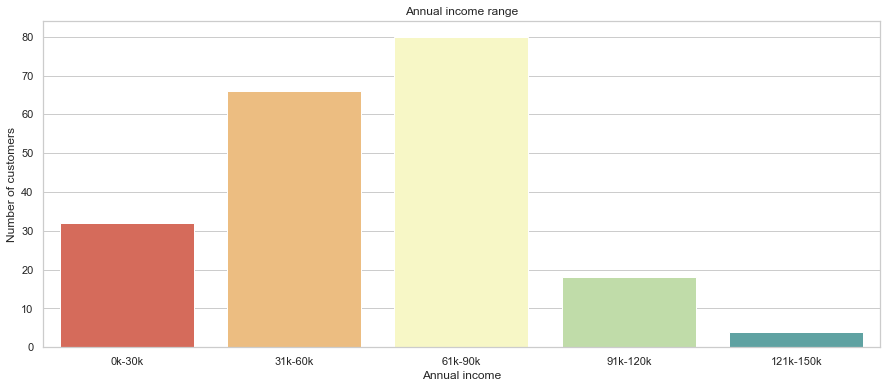

In [18]:
# Now dividing Annual income in different ranges like 0-30, 31-60,...121-150
ai_0to30=df.AnnualIncome[(df.AnnualIncome>=0) & (df.AnnualIncome<=30)]
ai_31to60=df.AnnualIncome[(df.AnnualIncome>=31) & (df.AnnualIncome<=60)]
ai_61to90=df.AnnualIncome[(df.AnnualIncome>=61) & (df.AnnualIncome<=90)]
ai_91to120=df.AnnualIncome[(df.AnnualIncome>=91) & (df.AnnualIncome<=120)]
ai_121to150=df.AnnualIncome[(df.AnnualIncome>=121) & (df.AnnualIncome<=150)]

# Visualizing for the above created ranges of annual income
aix=["0k-30k", "31k-60k","61k-90k","91k-120k","121k-150k"]
aiy=[len(ai_0to30.values), len(ai_31to60.values), len(ai_61to90.values), len(ai_91to120.values), len(ai_121to150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.title("Annual income range")
plt.xlabel("Annual income")
plt.ylabel("Number of customers")
plt.show()

Most customers have annual income 61k-90k dollars.

# Lets begin clustering

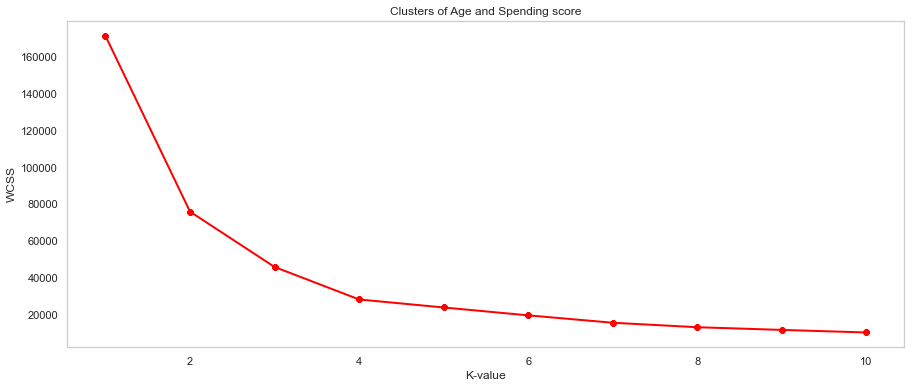

In [19]:
#Inititally we are using relationship between age and spending score to cluster data accordingly 
#Finding optimum number of clusters
X1=df.loc[:,["Age","SpendingScore"]].values

from sklearn.cluster import KMeans
wcss=[]     
for k in range(1, 11): # select the range for k 
    kmeans = KMeans(n_clusters=k, init="k-means++") # build the model using within cluster sum of squares method
    kmeans.fit(X1) # fit the model
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.title("Clusters of Age and Spending score")
plt.xlabel("K-value")
plt.ylabel("WCSS")     
plt.show()

Here we get the elbow point at 4, so the optimum number of clusters chosen is 4.

In [20]:
# Building model for k=4 
model = KMeans(n_clusters=4)
# Fit the model
label= model.fit_predict(X1)    
print(label)

[1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 1 1 2 0 1 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2
 0 2 0 3 0 3 1 2 1 3 1 1 1 3 1 1 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 1 3 3 3 3
 3 1 3 1 1 3 3 1 3 3 1 3 3 1 1 3 3 1 3 1 1 1 3 1 3 1 1 3 3 1 3 1 3 3 3 3 3
 1 1 1 1 1 3 3 3 3 1 1 1 0 1 0 3 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 3 0
 2 0 2 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [21]:
# Checking the centroids
print(model.cluster_centers_)

[[30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]


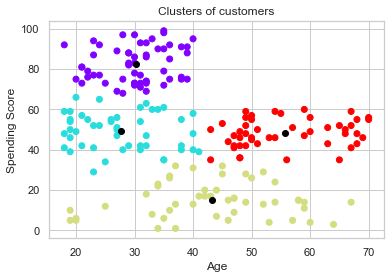

In [22]:
# Visualizing clusters on graph
plt.scatter(X1[:,0], X1[:,1], c= model.labels_, cmap="rainbow")
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],color='black')  #for visualizing centroids in black
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

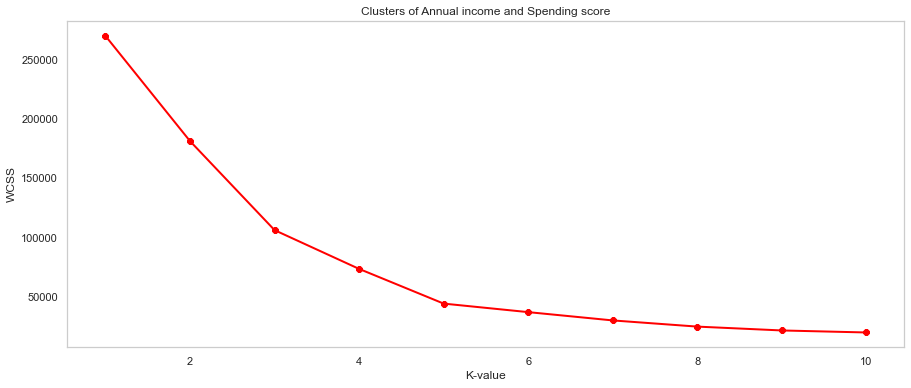

In [24]:
# Now similarly creating clusters based on Annual income and Spending score
X2=df.loc[:,["AnnualIncome","SpendingScore"]].values

from sklearn.cluster import KMeans
wcss1=[]     
for k in range(1, 11): # select the range for k 
    kmeans = KMeans(n_clusters=k, init="k-means++") 
    kmeans.fit(X2)
    wcss1.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11), wcss1, linewidth=2, color="red", marker="8")
plt.title("Clusters of Annual income and Spending score")
plt.xlabel("K-value")
plt.ylabel("WCSS")     
plt.show()

In this, we get the elbow point at 5, so taking 5 as the optimum number of clusters.

In [25]:
# Building model for k=5
model2 = KMeans(n_clusters=5)
# fit the model
label= model2.fit_predict(X2)
print(label)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 0 4 1 4 0 4 0 4 1 4 0 4 0 4 0 4 0 4 1 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]


In [26]:
# Checking the centroids
print(model2.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


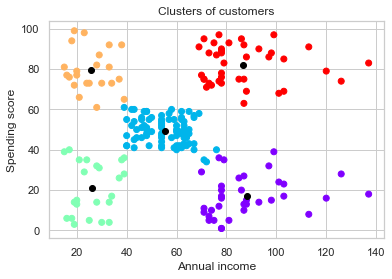

In [27]:
# Visualizing clusters for Annual income and Spending score
plt.scatter(X2[:,0], X2[:,1], c=model2.labels_, cmap="rainbow")
plt.scatter(model2.cluster_centers_[:,0], model2.cluster_centers_[:,1],color='black')  #for visualizing centroids in black
plt.title('Clusters of customers')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.show()

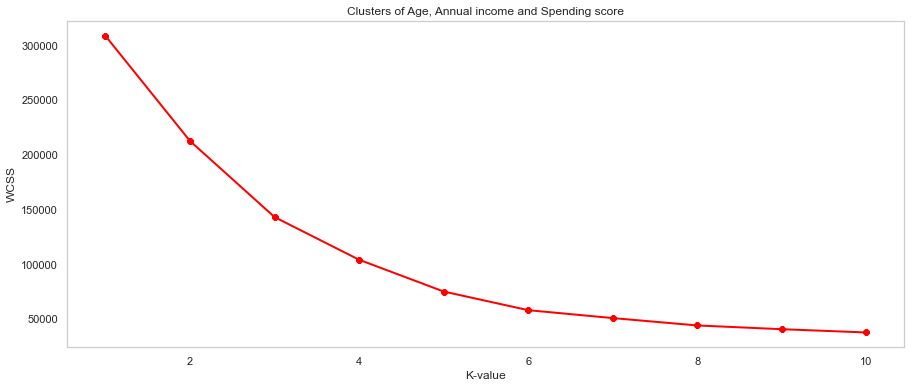

In [28]:
# Now taking all three columns, i.e, Age, Annual income and Spending score to create clusters
X3=df.iloc[:,1:]
wcss3=[]     
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, init="k-means++") 
    kmeans.fit(X3)
    wcss3.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11), wcss3, linewidth=2, color="red", marker="8")
plt.title("Clusters of Age, Annual income and Spending score")
plt.xlabel("K-value")
plt.ylabel("WCSS")     
plt.show()

The optimum number of clusters for this is taken as 5 as per the elbow point.

In [29]:
# Building model for k=5 
model3 = KMeans(n_clusters=5)
# fit the model
label2= model3.fit_predict(X3)
print(label2)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [30]:
#checking the centroids
print(model3.cluster_centers_)

[[43.08860759 55.29113924 49.56962025]
 [40.66666667 87.75       17.58333333]
 [32.69230769 86.53846154 82.12820513]
 [25.52173913 26.30434783 78.56521739]
 [45.2173913  26.30434783 20.91304348]]


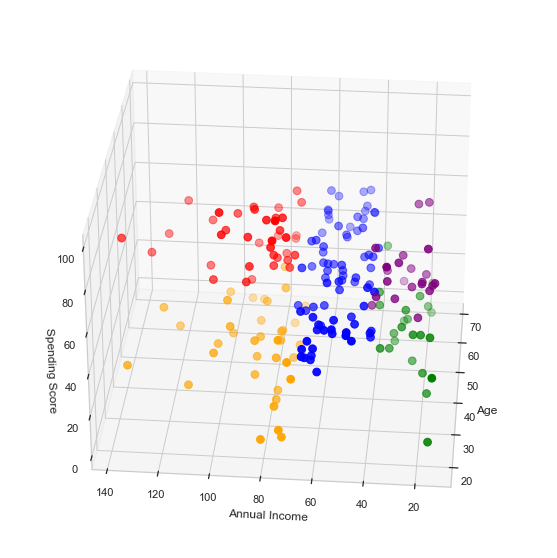

In [31]:
# Using 3-d graph to plot these three variables (representing x, y and z axis)
clusters= model3.fit_predict(X3)
df["label"]=clusters

from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label==0], df["AnnualIncome"][df.label==0], df["SpendingScore"][df.label==0], c='blue', s=60)
ax.scatter(df.Age[df.label==1], df["AnnualIncome"][df.label==1], df["SpendingScore"][df.label==1], c='red', s=60)
ax.scatter(df.Age[df.label==2], df["AnnualIncome"][df.label==2], df["SpendingScore"][df.label==2], c='green', s=60)
ax.scatter(df.Age[df.label==3], df["AnnualIncome"][df.label==3], df["SpendingScore"][df.label==3], c='orange', s=60)
ax.scatter(df.Age[df.label==4], df["AnnualIncome"][df.label==4], df["SpendingScore"][df.label==4], c='purple', s=60)
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel("Spending Score")
plt.show()

The five clusters are represented by five different colors in this graph.

In [32]:
# Checking the dataframe for newly added column 'label'
df.head(10)

,Gender,Age,AnnualIncome,SpendingScore,label
0,Male,19,15,39,2
1,Male,21,15,81,4
2,Female,20,16,6,2
3,Female,23,16,77,4
4,Female,31,17,40,2
5,Female,22,17,76,4
6,Female,35,18,6,2
7,Female,23,18,94,4
8,Male,64,19,3,2
9,Female,30,19,72,4


In [33]:
df.tail(10)

,Gender,Age,AnnualIncome,SpendingScore,label
190,Female,34,103,23,3
191,Female,32,103,69,1
192,Male,33,113,8,3
193,Female,38,113,91,1
194,Female,47,120,16,3
195,Female,35,120,79,1
196,Female,45,126,28,3
197,Male,32,126,74,1
198,Male,32,137,18,3
199,Male,30,137,83,1


The label column refers to the corresponding clusters for each row.

<AxesSubplot:xlabel='label', ylabel='count'>

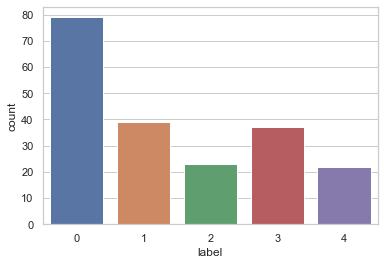

In [34]:
# Using countplot to check for cluster size
sns.countplot(data= df, x ='label')

The maximum number of customers belong to the cluster with label '0' and represented by blue color in the graph above. 

In [35]:
cust_seg= df[df.label==0]
cust_seg

,Gender,Age,AnnualIncome,SpendingScore,label
43,Female,31,39,61,0
46,Female,50,40,55,0
47,Female,27,40,47,0
48,Female,29,40,42,0
49,Female,31,40,42,0
...,...,...,...,...,...
119,Female,50,67,57,0
120,Male,27,67,56,0
121,Female,38,67,40,0
122,Female,40,69,58,0


In [36]:
cust_seg.Age.unique()

array([31, 50, 27, 29, 49, 33, 59, 47, 51, 69, 53, 70, 19, 67, 54, 63, 18,
       43, 68, 32, 60, 26, 45, 40, 23, 57, 38, 46, 21, 48, 55, 22, 34, 24,
       20, 66, 65], dtype=int64)

In [37]:
cust_seg.Age.sort_values()

91     18
114    18
65     18
68     19
61     19
       ..
90     68
108    68
57     69
60     70
70     70
Name: Age, Length: 79, dtype: int64

In [38]:
cust_seg.Gender.value_counts()

Female    46
Male      33
Name: Gender, dtype: int64

In [39]:
cust_seg.AnnualIncome.unique()

array([39, 40, 42, 43, 44, 46, 47, 48, 49, 50, 54, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 67, 69, 71], dtype=int64)

In [40]:
cust_seg.AnnualIncome.value_counts().sort_values(ascending= False)

54    12
63     6
62     6
60     6
48     6
65     4
40     4
67     4
46     4
43     4
61     2
57     2
42     2
64     2
44     2
50     2
59     2
58     2
47     2
49     2
69     1
39     1
71     1
Name: AnnualIncome, dtype: int64

In [41]:
cust_seg.SpendingScore.unique()

array([61, 55, 47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53,
       44, 57, 58, 40, 43, 35], dtype=int64)

In [42]:
cust_seg.SpendingScore.value_counts()

42    8
55    7
46    6
50    5
52    5
48    5
59    5
47    4
41    4
56    4
49    3
51    3
43    3
54    3
60    3
57    2
40    2
58    2
61    1
44    1
53    1
45    1
35    1
Name: SpendingScore, dtype: int64

# Conclusion

From these findings, we can conclude that female customers, customers with annual income between 40k to 65k and spending score between 40-60 buy more as compared to customers with other demographic values. 

So, we can say that this customer segment with the mentioned values is profitable for mall's business in comparison to other segments.
However, age is not a relevant determining factor here as it belongs to wide range of 18 to 70 years. Effective marketing strategies can be planned to exploit these findings to increase mall revenue. 

In [43]:
# Serializing our model to a file called model.pkl
import pickle
pickle.dump(model3, open("model3.pkl","wb"))